In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading dataset
dataset = pd.read_csv('C:\\Users\\DELL\\Desktop\\ASSIGNMENTS\\minor-project\\data-files\\appended_songs.csv')
dataset = dataset.drop(dataset.columns[0],axis = 1)

In [5]:
dataset.head()

,Title,Artist,Top100,URI,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time_Signature
0,Caged Bird,Myles Cameron,0,3MPcfaxPTQPR3w58qaODvX,0.575,0.352,1,-13.813,1,0.0388,0.768,0.485000,0.0974,0.447,100.023,235200,4
1,More Than Friends,RealLiveAnimals,0,01pmPw3Tfm08YF1rRdTcv6,0.742,0.301,2,-10.652,0,0.0424,0.470,0.000154,0.1080,0.268,116.914,164153,4
2,Speaking Of,Souly Had,0,3nPxnMPQG3J8ndJqAetZya,0.458,0.502,1,-7.483,1,0.3610,0.479,0.000000,0.1020,0.612,174.098,202248,3
3,Rarri,Amilli,0,4DU9lFHzSh1M52pZEeBEwb,0.817,0.482,6,-6.715,1,0.0640,0.618,0.000334,0.1610,0.612,95.992,205469,4
4,Easy Baby,Denyah,0,3hiaRDT2SmsR8aYl93MqgT,0.829,0.408,9,-10.172,1,0.0389,0.769,0.544000,0.1040,0.753,124.983,199900,4


In [6]:
#Spilling dataset into features and target variable
X = dataset.iloc[:, 4:15].values
y = dataset.iloc[:, 2].values

In [7]:
X

array([[5.75000e-01, 3.52000e-01, 1.00000e+00, ..., 9.74000e-02,
        4.47000e-01, 1.00023e+02],
       [7.42000e-01, 3.01000e-01, 2.00000e+00, ..., 1.08000e-01,
        2.68000e-01, 1.16914e+02],
       [4.58000e-01, 5.02000e-01, 1.00000e+00, ..., 1.02000e-01,
        6.12000e-01, 1.74098e+02],
       ...,
       [6.98000e-01, 2.02000e-01, 1.00000e+00, ..., 1.22000e-01,
        1.15000e-01, 1.14975e+02],
       [7.29000e-01, 6.88000e-01, 3.00000e+00, ..., 2.95000e-01,
        6.71000e-01, 1.23867e+02],
       [3.62000e-01, 3.79000e-01, 4.00000e+00, ..., 1.21000e-01,
        1.07000e-01, 6.16020e+01]])

In [8]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [9]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
#Performing feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierLR,X = X_train ,y = y_train, cv = 10)

In [15]:
accuracies.mean()

0.6583496487389151

In [16]:
accuracies.std()

0.01409667132414898

In [17]:
y_pred_LR = classifierLR.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)

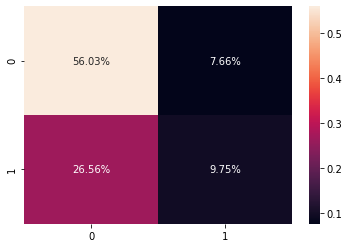

In [20]:
import seaborn as sns
sns.heatmap(cm_LR/np.sum(cm_LR), annot=True, fmt='.2%')

In [21]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred_NB = classifierNB.predict(X_test)

In [23]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

In [29]:
accuraciesNB = cross_val_score(estimator = classifierNB,X = X_train ,y = y_train, cv = 10)

In [30]:
accuraciesNB.mean()

0.5319685976429037

In [31]:
accuraciesNB.std()

0.024186358712161675

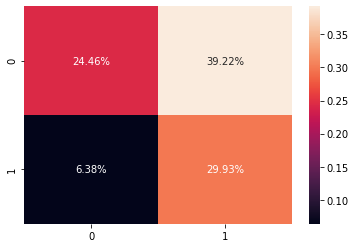

In [32]:
sns.heatmap(cm_NB/np.sum(cm_NB), annot=True, fmt='.2%')

In [33]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred_KNN = classifierKNN.predict(X_test)

In [35]:
accuraciesKNN = cross_val_score(estimator = classifierKNN,X = X_train ,y = y_train, cv = 10)

In [36]:
accuraciesKNN.mean()

0.6296609274828209

In [37]:
accuraciesKNN.std()

0.01679633778135714

In [38]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

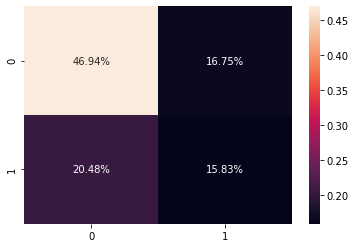

In [39]:
sns.heatmap(cm_KNN/np.sum(cm_KNN), annot=True, fmt='.2%')

In [40]:
#Decesion Tree Classification
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred_DT = classifierDT.predict(X_test)

In [42]:
accuraciesDT = cross_val_score(estimator = classifierDT,X = X_train ,y = y_train, cv = 10)

In [43]:
accuraciesDT.mean()

0.6270269492111022

In [44]:
accuraciesDT .std()

0.019938334557703608

In [46]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

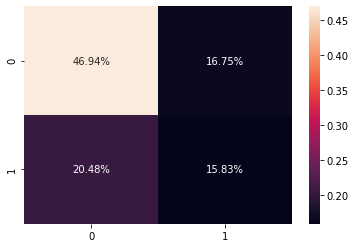

In [47]:
sns.heatmap(cm_KNN/np.sum(cm_KNN), annot=True, fmt='.2%')

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [49]:
y_pred_RF = classifierRF.predict(X_test)

In [50]:
accuraciesRF = cross_val_score(estimator = classifierRF,X = X_train ,y = y_train, cv = 10)

In [51]:
accuraciesRF.mean()

0.6728070175438596

In [52]:
accuraciesRF.std()

0.022186100466937583

In [53]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

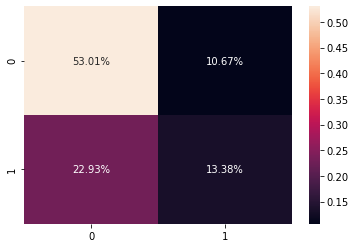

In [54]:
sns.heatmap(cm_RF/np.sum(cm_RF), annot=True, fmt='.2%')

In [55]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state = 0)
classifierSVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [56]:
y_pred_SVM = classifierSVM.predict(X_test)

In [57]:
accuraciesSVM = cross_val_score(estimator = classifierSVM,X = X_train ,y = y_train, cv = 10)

In [58]:
accuraciesSVM.mean()

0.6395101539406504

In [59]:
accuraciesSVM.std()

0.0006864476610356235

In [60]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

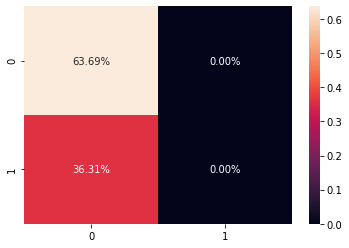

In [61]:
sns.heatmap(cm_SVM/np.sum(cm_SVM), annot=True, fmt='.2%')

In [62]:
#ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
classifierANN = Sequential()

classifierANN.add(Dense(6,input_dim = 11,activation = 'relu' ))
classifierANN.add(Dense(6,activation = 'relu'))
classifierANN.add(Dense(1,activation = 'sigmoid'))

In [63]:
classifierANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
history = classifierANN.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6196
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6380
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.6395
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.6395
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6143 - accuracy: 0.6395
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6395
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6083 - accuracy: 0.6395
Epoch 8/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6060 - accuracy: 0.6395
Epoch 9/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.6395
Epoch 10/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6404
Epoch 11/

72/72 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.6969
Epoch 82/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.6965
Epoch 83/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.6975
Epoch 84/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.6962
Epoch 85/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.6954
Epoch 86/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.6986
Epoch 87/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.6971
Epoch 88/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.6949
Epoch 89/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5629 - accuracy: 0.6960
Epoch 90/100
72/72 [==============================] - ETA: 0s - loss: 0.5645 - accuracy: 0.69 - 0s 4ms/step - los

In [66]:
y_pred_ANN = classifierANN.predict(X_test)
y_pred_ANN = (y_pred_ANN > 0.5)

In [67]:
cm_ANN = confusion_matrix(y_test, y_pred_ANN)

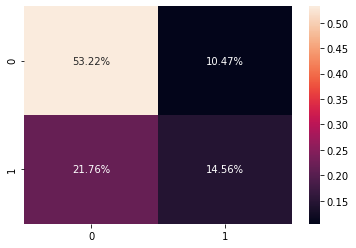

In [68]:
sns.heatmap(cm_ANN/np.sum(cm_ANN), annot=True, fmt='.2%')